<a href="https://colab.research.google.com/github/academicengineer/academicengineer/blob/main/%E5%88%9D%E9%9B%81%E9%AB%98%E6%A0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# matplotlib 日本語化
!pip install japanize_matplotlib --quiet

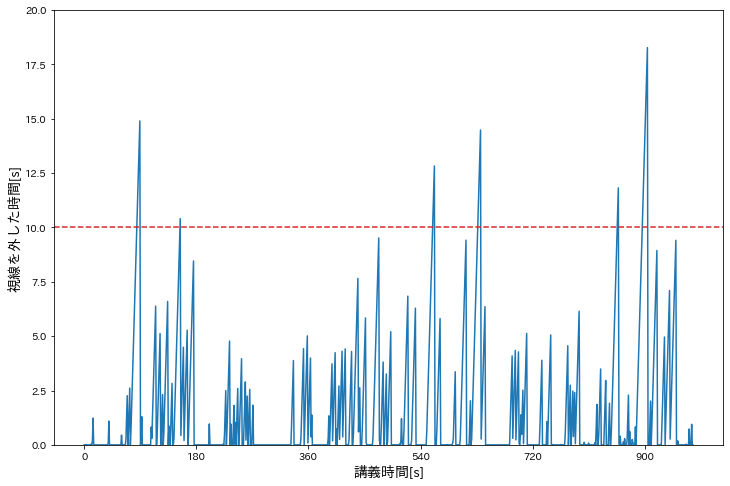

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import japanize_matplotlib
import numpy as np

LABEL_SIZE = 14
XAXIS_STEP_SIZE = 180 # 秒間隔

def plot_gaze(df):
  """
  gazeデータをプロット, 10sの地点に補助線を引いている
  """
  fig, ax = plt.subplots(figsize=(12,8))
  x = df.iloc[:,0].apply(lambda x: x - df.iloc[0,0])  # 時間を正規化
  ax.plot(x, df.iloc[:,1])
  ax.axhline(10, color="tab:red", ls='--')  # 横線(10秒)
  ax.set_ylim(0,20)
  ax.set_xticks(np.arange(0, len(df), XAXIS_STEP_SIZE))
  ax.set_ylabel("視線を外した時間[s]", fontsize=LABEL_SIZE)
  ax.set_xlabel("講義時間[s]", fontsize=LABEL_SIZE)

def plt_return_point(df):
  """
  視線がモニターに戻ったタイミングをプロット
  """
  fig, ax = plt.subplots()
  x = df.iloc[:, 0].apply(lambda x: x - df.iloc[0, 0])  # 時間を正規化
  

df = pd.read_csv("/content/tobii_log/tobii_log_subject12_network_3.csv", header=None)
df.columns = ['time', 'gazetime', 'state']
plot_gaze(df)